In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy


In [109]:
# Automatically parse dates and use the first column as index (Year in this dataset)
df=pd.read_csv("epa-sea-level.csv",
              parse_dates=True,
              index_col=0)
#print(df.info())
#print(df.head())
df

,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
Year,,,,
1880-01-01,0.000000,-0.952756,0.952756,NaN
1881-01-01,0.220472,-0.732283,1.173228,NaN
1882-01-01,-0.440945,-1.346457,0.464567,NaN
1883-01-01,-0.232283,-1.129921,0.665354,NaN
1884-01-01,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...
2009-01-01,8.586614,8.311024,8.862205,8.046354
2010-01-01,8.901575,8.618110,9.185039,8.122973
2011-01-01,8.964567,8.661417,9.267717,8.053065


In [110]:
# We don't need data parsing in this example.
df=pd.read_csv("epa-sea-level.csv")
#print(df.info())
#print(df.head())
df

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN
...,...,...,...,...,...
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058


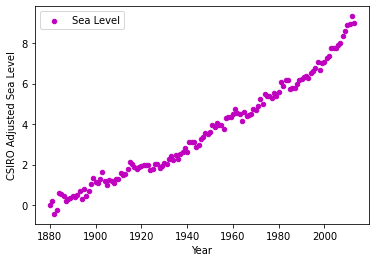

In [123]:
# Scatter Plot - Option 1 - Using Dataframe plot function

ax = df.plot.scatter(x="Year",y="CSIRO Adjusted Sea Level", c="m", label="Sea Level")    # Returns AxesSubPlot
print(ax.get_title())



0     1880
1     1881
2     1882
3     1883
4     1884
      ... 
31    2045
32    2046
33    2047
34    2048
35    2049
Length: 170, dtype: int64
Rise in Sea Level


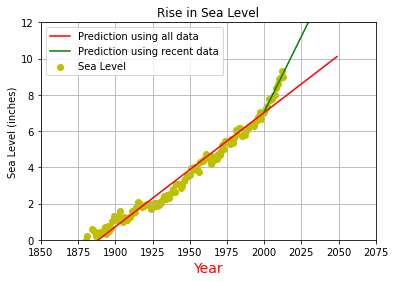

[-0.5421240249263661, -0.4790794409142336, -0.41603485690208686, -0.3529902728899543, -0.2899456888778218, -0.22690110486568926, -0.16385652085355673, -0.1008119368414242, -0.037767352829277456, 0.025277231182855076, 0.08832181519498761, 0.15136639920712014, 0.21441098321925267, 0.2774555672313852, 0.34050015124351773, 0.4035447352556645, 0.466589319267797, 0.5296339032799295, 0.5926784872920621, 0.6557230713041946, 0.7187676553163271, 0.7818122393284739, 0.8448568233406064, 0.9079014073527389, 0.9709459913648715, 1.033990575377004, 1.0970351593891365, 1.1600797434012833, 1.2231243274134158, 1.2861689114255483, 1.3492134954376809, 1.4122580794498134, 1.475302663461946, 1.5383472474740927, 1.6013918314862252, 1.6644364154983577, 1.7274809995104903, 1.7905255835226228, 1.8535701675347553, 1.9166147515468879, 1.9796593355590346, 2.042703919571167, 2.1057485035832997, 2.168793087595432, 2.2318376716075647, 2.2948822556196973, 2.357926839631844, 2.4209714236439766, 2.484016007656109, 2.5470

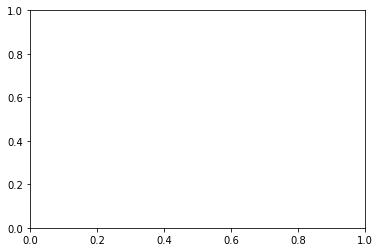

In [135]:
# Scatter Plot - Option 2 - Using pyplot directly

plt.scatter(df["Year"], df["CSIRO Adjusted Sea Level"], c="y", label="Sea Level")
plt.xlabel('Year', fontsize=14, color='red')
plt.ylabel('Sea Level (inches)')
plt.title("Rise in Sea Level")
plt.axis([1850.0, 2075.0, 0, 12])
plt.grid(True)
plt.legend(loc='upper left')

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df["Year"], df["CSIRO Adjusted Sea Level"])
#plt.plot(df["Year"], intercept + slope*df["Year"], 'r', label='fitted line')

# Create new Panda Series till 2050 for predicting future
years = df["Year"]
more = pd.Series([ii for ii in range(df["Year"].max() + 1, 2050)])
years = years.append(more)
print(years)

# Now plot a line  that predicts the sealevel till 2050 using current slope
plt.plot(years, intercept + slope*years, 'r', label='Prediction using all data')    # r for red
plt.legend(loc='upper left')


# Predict using data from year 2000 through the most recent year
df1 = df.query("Year > 1999")
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df1["Year"], df1["CSIRO Adjusted Sea Level"])
years = df1["Year"]
years = years[years > 1999]
more = pd.Series([ii for ii in range(df1["Year"].max() + 1, 2050)])
years = years.append(more)
years = years.reset_index(drop=True)
plt.plot(years, intercept + slope*years, 'g-', label='Prediction using recent data')    # g for green
plt.legend(loc='upper left')

ax = plt.gca()
print(ax.get_title())

plt.show()

print(ax.get_lines()[0].get_ydata().tolist())
print(ax.get_lines()[1].get_ydata().tolist())


# A new plt starts from here (after show()). Save references before this else 
# you lose them. The following will be empty
ax = plt.gca()
print(ax.get_title())


In [45]:
# Once the plot is rendered, you can draw the next one using same API.

(array([-2.,  0.,  2.,  4.,  6.,  8., 10.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

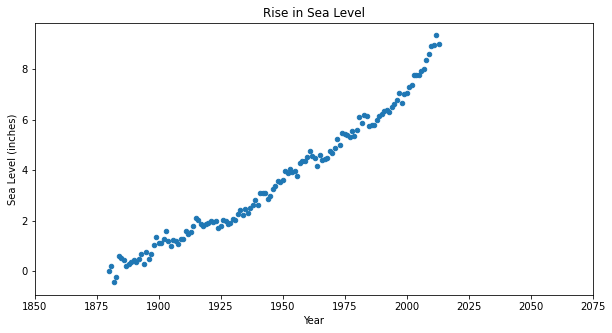

In [4]:
# Scatter Plot - Option 3. Specify the size and pass it.

fig, ax= plt.subplots(figsize=(10,5))
df.plot.scatter(x="Year",y="CSIRO Adjusted Sea Level", ax=ax)
ax.set_title("Rise in Sea Level")
ax.set_ylabel('Sea Level (inches)')
plt.xticks([1850.0, 1875.0, 1900.0, 1925.0, 1950.0, 1975.0, 2000.0, 2025.0, 2050.0, 2075.0])
plt.yticks(fontsize = 10)


In [5]:
ax.get_title()

'Rise in Sea Level'

In [6]:
ax.get_ylabel()

'Sea Level (inches)'

In [7]:
ax.get_xlabel()

'Year'

In [8]:
ax.get_xticks().tolist()

[1850.0,
 1875.0,
 1900.0,
 1925.0,
 1950.0,
 1975.0,
 2000.0,
 2025.0,
 2050.0,
 2075.0]

In [9]:
ax.get_children()[0].get_offsets().data.tolist()

[[1880.0, 0.0],
 [1881.0, 0.22047244100000002],
 [1882.0, -0.440944881],
 [1883.0, -0.232283464],
 [1884.0, 0.590551181],
 [1885.0, 0.531496062],
 [1886.0, 0.43700787399999996],
 [1887.0, 0.216535433],
 [1888.0, 0.299212598],
 [1889.0, 0.362204724],
 [1890.0, 0.440944881],
 [1891.0, 0.374015748],
 [1892.0, 0.499999999],
 [1893.0, 0.6850393690000001],
 [1894.0, 0.303149606],
 [1895.0, 0.767716535],
 [1896.0, 0.46850393700000004],
 [1897.0, 0.6732283459999999],
 [1898.0, 1.043307086],
 [1899.0, 1.338582676],
 [1900.0, 1.125984251],
 [1901.0, 1.1102362190000001],
 [1902.0, 1.291338581],
 [1903.0, 1.6062992109999998],
 [1904.0, 1.2007874],
 [1905.0, 0.9842519679999999],
 [1906.0, 1.251968503],
 [1907.0, 1.196850392],
 [1908.0, 1.098425196],
 [1909.0, 1.27559055],
 [1910.0, 1.2716535420000001],
 [1911.0, 1.598425195],
 [1912.0, 1.476377951],
 [1913.0, 1.5472440930000002],
 [1914.0, 1.795275589],
 [1915.0, 2.10629921],
 [1916.0, 2.031496061],
 [1917.0, 1.854330707],
 [1918.0, 1.791338581],
 

In [22]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df["Year"], df["CSIRO Adjusted Sea Level"])
print(slope, intercept, r_value, p_value, std_err)

0.0630445840121348 -119.06594196773978 0.9847571311825848 3.788696979116818e-102 0.0009692118713287222


([<matplotlib.axis.XTick at 0x7f473cf4b400>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

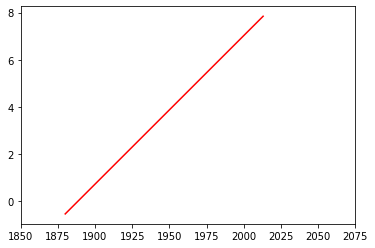

In [37]:
#plt.plot(df["Year"], df["CSIRO Adjusted Sea Level"], 'o', label='original data')
#df.plot.scatter(x="Year",y="CSIRO Adjusted Sea Level", ax=ax)


plt.plot(df["Year"], intercept + slope*df["Year"], 'r', label='fitted line')
plt.xticks([1850.0, 1875.0, 1900.0, 1925.0, 1950.0, 1975.0, 2000.0, 2025.0, 2050.0, 2075.0])

In [13]:
ax.get_lines()[0].get_ydata().tolist()

IndexError: list index out of range

In [103]:

df1 = df.query("Year > 1999")
print(df1)
years = df1["Year"]
years = years[years > 2000]
more = pd.Series([ii for ii in range(df1["Year"].max() + 1, 2051)])
years = years.append(more)
years = years.reset_index(drop=True)
years

     Year  CSIRO Adjusted Sea Level  Lower Error Bound  Upper Error Bound  \
120  2000                  7.062992           6.791339           7.334646   
121  2001                  7.287402           7.019685           7.555118   
122  2002                  7.381890           7.110236           7.653543   
123  2003                  7.759843           7.484252           8.035433   
124  2004                  7.740157           7.464567           8.015748   
125  2005                  7.744094           7.472441           8.015748   
126  2006                  7.917323           7.645669           8.188976   
127  2007                  7.996063           7.712598           8.279528   
128  2008                  8.350394           8.078740           8.622047   
129  2009                  8.586614           8.311024           8.862205   
130  2010                  8.901575           8.618110           9.185039   
131  2011                  8.964567           8.661417           9.267717   

0     2001
1     2002
2     2003
3     2004
4     2005
5     2006
6     2007
7     2008
8     2009
9     2010
10    2011
11    2012
12    2013
13    2014
14    2015
15    2016
16    2017
17    2018
18    2019
19    2020
20    2021
21    2022
22    2023
23    2024
24    2025
25    2026
26    2027
27    2028
28    2029
29    2030
30    2031
31    2032
32    2033
33    2034
34    2035
35    2036
36    2037
37    2038
38    2039
39    2040
40    2041
41    2042
42    2043
43    2044
44    2045
45    2046
46    2047
47    2048
48    2049
49    2050
dtype: int64